In [26]:
# Import libraries
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import mplleaflet
import matplotlib.pyplot as plt
import requests
import json

from utility import *

In [2]:
# Load the CSV file with flower data
columns=[   'Aanhef', 'Voorletters', 'Tussenvoegsel', 'Achternaam', 
            'Straatnaam', 'Huisnummer', 'Toevoeging', 'Postcode', 'Woonplaats'  ]

# Obtain the csv as a pandas dataframe
path = "flower_input.csv"
flower_dataframe = pd.read_csv(path, delimiter=";")

# Return the pandas dataframe
flower_dataframe.head()

,Aanhef,Voorletters,Tussenvoegsel,Achternaam,Straatnaam,Huisnummer,Toevoeging,Postcode,Woonplaats
0,Company,NaN,NaN,Itility,Flight Forum,3360,NaN,5657 EW,Eindhoven
1,Mevr.,N.J.,NaN,Verheggen,Venuslaan,97,NaN,5632 HB,Eindhoven
2,Mevr.,M.H.C.,NaN,Verheijen,Imkerstraat,244,NaN,5623 DK,Eindhoven
3,Dhr. en mevr.,NaN,NaN,Vermeulen,Antwerpenlaan,25,NaN,5628 XC,Eindhoven
4,Mevr.,G.,NaN,Verschuren,Venuslaan,711,NaN,5632 HV,Eindhoven


In [3]:
# Enrich input data
flower_dataframe_enriched = enrich_flower_data(flower_dataframe)
# print(flower_dataframe_enriched.head(5).to_string())
flower_dataframe_enriched.head()

,Aanhef,Voorletters,Tussenvoegsel,Achternaam,Straatnaam,Huisnummer,Toevoeging,Postcode,Woonplaats,Name,Address,Size
0,Company,nan,nan,Itility,Flight Forum,3360,NaN,5657EW,Eindhoven,Company Itility,Flight Forum 3360 5657EW Eindhoven,1
1,Mevr.,N.J.,nan,Verheggen,Venuslaan,97,NaN,5632HB,Eindhoven,Mevr. N.J. Verheggen,Venuslaan 97 5632HB Eindhoven,1
2,Mevr.,M.H.C.,nan,Verheijen,Imkerstraat,244,NaN,5623DK,Eindhoven,Mevr. M.H.C. Verheijen,Imkerstraat 244 5623DK Eindhoven,1
3,Dhr. en mevr.,nan,nan,Vermeulen,Antwerpenlaan,25,NaN,5628XC,Eindhoven,Dhr. en mevr. Vermeulen,Antwerpenlaan 25 5628XC Eindhoven,1
4,Mevr.,G.,nan,Verschuren,Venuslaan,711,NaN,5632HV,Eindhoven,Mevr. G. Verschuren,Venuslaan 711 5632HV Eindhoven,1


In [5]:
# Transform addresses to geolocation
flower_dataframe_geo, failed_addresses_df = add_geolocation_to_flower_dataframe(flower_dataframe_enriched)
flower_dataframe_geo.head(5)

,Aanhef,Voorletters,Tussenvoegsel,Achternaam,Straatnaam,Huisnummer,Toevoeging,Postcode,Woonplaats,Name,Address,Size,Longitude,Latitude
0,Company,nan,nan,Itility,Flight Forum,3360,NaN,5657EW,Eindhoven,Company Itility,Flight Forum 3360 5657EW Eindhoven,1,5.404500,51.450187
1,Mevr.,N.J.,nan,Verheggen,Venuslaan,97,NaN,5632HB,Eindhoven,Mevr. N.J. Verheggen,Venuslaan 97 5632HB Eindhoven,1,5.488001,51.468241
2,Mevr.,M.H.C.,nan,Verheijen,Imkerstraat,244,NaN,5623DK,Eindhoven,Mevr. M.H.C. Verheijen,Imkerstraat 244 5623DK Eindhoven,1,5.473166,51.454618
3,Dhr. en mevr.,nan,nan,Vermeulen,Antwerpenlaan,25,NaN,5628XC,Eindhoven,Dhr. en mevr. Vermeulen,Antwerpenlaan 25 5628XC Eindhoven,1,5.477722,51.480267
4,Mevr.,G.,nan,Verschuren,Venuslaan,711,NaN,5632HV,Eindhoven,Mevr. G. Verschuren,Venuslaan 711 5632HV Eindhoven,1,5.489439,51.475132


In [61]:
# Visualize
fig, ax = plt.subplots(figsize=(16,16))
flower_dataframe_geo.plot(x='Longitude', y='Latitude', kind='scatter', s=40, 
                color='red', ax=ax)
fig = mplleaflet.display(fig=fig)
fig

/home/stijn/anaconda3/envs/spatial/lib/python3.7/site-packages/mplleaflet/mplexporter/exporter.py:263: MatplotlibDeprecationWarning: 
The get_offset_position function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  offset_order = offset_dict[collection.get_offset_position()]
/home/stijn/anaconda3/envs/spatial/lib/python3.7/site-packages/IPython/core/display.py:717: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [59]:
lon_lat =  flower_dataframe_geo[0:1][["Longitude", "Latitude"]].values
cccccccc =  lon_lat[0][0], lon_lat[0][1]

lon_lat =  flower_dataframe_geo[1:2][["Longitude", "Latitude"]].values
lon_2, lat_2 =  lon_lat[0][0], lon_lat[0][1]

In [91]:
# call the OSMR API
r = requests.get(f"http://router.project-osrm.org/route/v1/car/{lon_1},{lat_1};{lon_2},{lat_2}?overview=false&alternatives=false&geometries=polyline""")

# then you load the response using the json libray
# by default you get only one alternative so you access 0-th element of the `routes`

In [93]:
routes = json.loads(r.content)
route_1 = routes.get("routes")[0]
print(route_1)

{'legs': [{'steps': [{'intersections': [{'out': 0, 'entry': [True], 'location': [5.404688, 51.450183], 'bearings': [2]}], 'driving_side': 'right', 'geometry': 'sz_yHir~_@??', 'duration': 0, 'distance': 0, 'name': '', 'weight': 0, 'mode': 'driving', 'maneuver': {'bearing_after': 2, 'location': [5.404688, 51.450183], 'type': 'depart', 'bearing_before': 0, 'modifier': 'straight'}}, {'intersections': [{'in': 0, 'entry': [True], 'location': [5.404688, 51.450183], 'bearings': [182]}], 'driving_side': 'right', 'geometry': 'sz_yHir~_@', 'duration': 0, 'distance': 0, 'name': '', 'weight': 0, 'mode': 'driving', 'maneuver': {'bearing_after': 0, 'location': [5.404688, 51.450183], 'type': 'arrive', 'bearing_before': 2, 'modifier': 'straight'}}], 'weight': 0, 'distance': 0, 'summary': '', 'duration': 0}], 'weight_name': 'routability', 'weight': 0, 'distance': 0, 'duration': 0}


In [76]:
lon_1, lat_1 = flower_dataframe_geo.loc[0, 'Longitude'], flower_dataframe_geo.loc[0, 'Latitude']
lon_2, lat_2 = flower_dataframe_geo.loc[1, 'Longitude'], flower_dataframe_geo.loc[1, 'Latitude']
print(lon_1)
print(lat_1)
print()
print(lon_2)
print(lat_2)

5.4045001
51.4501875

5.4880008
51.4682405


In [ ]:
# Initialize the distance matrix
all_locations = np.arange(0, flower_dataframe_geo.shape[0])
distance_matrix = np.ones((flower_dataframe_geo.shape[0], flower_dataframe_geo.shape[0]))
#route_matrix = np.ones((flower_dataframe_geo.shape[0], flower_dataframe_geo.shape[0]))


# Fill the distance matrix and  with OSMR distances and route_matrix with OSMR routes
for i in all_locations:
    for j in all_locations:
        # get lon en lat
        lon_1, lat_1 = flower_dataframe_geo.loc[i, 'Longitude'], flower_dataframe_geo.loc[i, 'Latitude']
        lon_2, lat_2 = flower_dataframe_geo.loc[j, 'Longitude'], flower_dataframe_geo.loc[j, 'Latitude']
        # call the OSMR API
        r = requests.get(f"http://router.project-osrm.org/route/v1/car/{lon_1},{lat_1};{lon_2},{lat_2}?overview=false&alternatives=false""")
        # load the response using the json libray
        routes = json.loads(r.content)
        # fill route_matrix
        #route_matrix[i, j] = routes.get("routes")[0].get('distance')
        # fill distance_matrix
        distance_matrix[i, j] = routes.get("routes")[0].get('distance')
        
print(all_locations)
print()
print(distance_matrix)

In [7]:
# Calculate optimal routes using clark and wright cost savings heuristic
flower_dataframe_routes = clarke_wright_cost_savings_heuristic(flower_dataframe_geo, distances, locations)
flower_dataframe_routes.head(5)

      From   To      Savings
0      101  102     0.214383
1      102  101     0.214383
2       94  107     0.211337
3      107   94     0.211337
4       94  102     0.211154
...    ...  ...          ...
12095    0   54  -1000000000
12096   54   54  -1000000000
12097    1    0  -1000000000
12098   55   55  -1000000000
12099  109  109  -1000000000

[12100 rows x 3 columns]


,Aanhef,Voorletters,Tussenvoegsel,Achternaam,Straatnaam,Huisnummer,Toevoeging,Postcode,Woonplaats,Name,Address,Size,Longitude,Latitude,coming_from,going_to,route_id,capacity_required
0,Company,nan,nan,Itility,Flight Forum,3360,NaN,5657EW,Eindhoven,Company Itility,Flight Forum 3360 5657EW Eindhoven,1,5.404500,51.450187,0,0,0,1
1,Mevr.,N.J.,nan,Verheggen,Venuslaan,97,NaN,5632HB,Eindhoven,Mevr. N.J. Verheggen,Venuslaan 97 5632HB Eindhoven,1,5.488001,51.468241,9,13,1,29
2,Mevr.,M.H.C.,nan,Verheijen,Imkerstraat,244,NaN,5623DK,Eindhoven,Mevr. M.H.C. Verheijen,Imkerstraat 244 5623DK Eindhoven,1,5.473166,51.454618,25,29,2,29
3,Dhr. en mevr.,nan,nan,Vermeulen,Antwerpenlaan,25,NaN,5628XC,Eindhoven,Dhr. en mevr. Vermeulen,Antwerpenlaan 25 5628XC Eindhoven,1,5.477722,51.480267,33,8,1,29
4,Mevr.,G.,nan,Verschuren,Venuslaan,711,NaN,5632HV,Eindhoven,Mevr. G. Verschuren,Venuslaan 711 5632HV Eindhoven,1,5.489439,51.475132,11,16,1,29


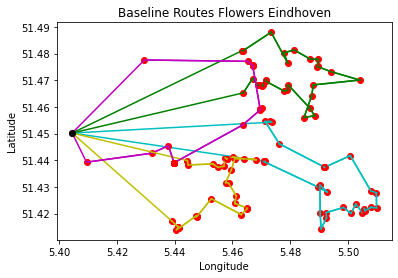

In [8]:
# Visualize the routes
visualize_routes(flower_dataframe_routes)

In [9]:
# Get the solution value of the entire VRP solution
vrp_solution_value = get_vrp_solution_value(flower_dataframe_routes, distances)
print("The total solution value of the optimized VRP is: " + str(vrp_solution_value))

The VRP solution after route 1 = 0.26079471317599595
The VRP solution after route 2 = 0.5363388579309347
The VRP solution after route 19 = 0.7132819474980743
The VRP solution after route 43 = 0.9001958444509706
The total solution value of the optimized VRP is: 0.9001958444509706
